In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation

import seaborn as sns                               # Advanced data visualisation

from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.
Each example describes characteristics of a cell nuclei image, which has been labeled as either benign or malignant (cancerous), based on an expert’s diagnosis of the cells. A sample cell image is shown below.  
**Attribute information**

1) ID number  
2) Diagnosis (M = malignant, B = benign)  
3-32)  Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter (perimeter of the mass)
	d) area (area of the mass)
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry (A measure of the nucleii's symmetry)
	j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

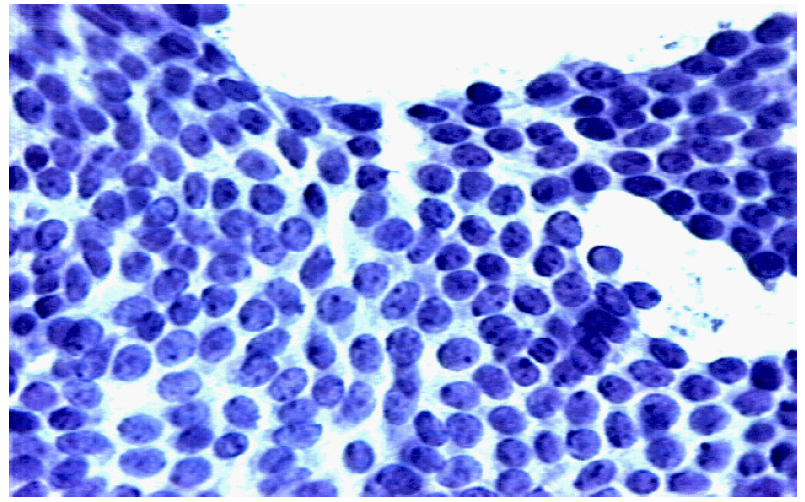

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/wdbc.csv')
# !! it is really important to give each of the columns an (appropriate) name, 
# otherwise you will get an error: all-features-must-be-in-0-9-or-10-0
# https://stackoverflow.com/questions/65789613/all-features-must-be-in-0-9-or-10-0
df.columns = ['id','diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension','radius_std','texture_std','perimeter_std','area_std','smoothness_std','compactness_std','concavity_std','concave points_std','symmetry_std','fractal dimension_std','radius_lg','texture_lg','perimeter_lg','area_lg','smoothness_lg','compactness_lg','concavity_lg','concave points_lg','symmetry_lg','fractal dimension_lg']
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius_lg,texture_lg,perimeter_lg,area_lg,smoothness_lg,compactness_lg,concavity_lg,concave points_lg,symmetry_lg,fractal dimension_lg
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Get some general info about the dataset (type of each column, null values, ...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     568 non-null    int64  
 1   diagnosis              568 non-null    object 
 2   radius                 568 non-null    float64
 3   texture                568 non-null    float64
 4   perimeter              568 non-null    float64
 5   area                   568 non-null    float64
 6   smoothness             568 non-null    float64
 7   compactness            568 non-null    float64
 8   concavity              568 non-null    float64
 9   concave points         568 non-null    float64
 10  symmetry               568 non-null    float64
 11  fractal dimension      568 non-null    float64
 12  radius_std             568 non-null    float64
 13  texture_std            568 non-null    float64
 14  perimeter_std          568 non-null    float64
 15  area_s

What is X? What is y?

What are the numeric columns (= columns containing numbers) in X?

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave points', 'symmetry', 'fractal dimension',
       'radius_std', 'texture_std', 'perimeter_std', 'area_std',
       'smoothness_std', 'compactness_std', 'concavity_std',
       'concave points_std', 'symmetry_std', 'fractal dimension_std',
       'radius_lg', 'texture_lg', 'perimeter_lg', 'area_lg', 'smoothness_lg',
       'compactness_lg', 'concavity_lg', 'concave points_lg', 'symmetry_lg',
       'fractal dimension_lg'],
      dtype='object')


Define the ColumnTransformer for applying standardization on the numeric columns.

What is X_train, y_train, X_test, y_test?

What is the shape of X_train, y_train, X_test and y_test?

(426, 30) (142, 30) (426,) (142,)


## Introduction  

We've already come across this dataset, using the SVM classifier.  
In this exercise we are going to take some steps to try to improve the classification, using the techniques shown in Chapter 7 of the book: Ensemble Learning and Random Forests  

### Part 1 

The first thing we ask ourselves is, if we can get a better result using a 'hard' voting classifier.  
1.   Create a new array all_clf that contains 4 tuples of classifiers: log_clf, rnd_clf, svm_clf and voting_clf (cfr. the array estimators)
2.   Loop through the array and print out the accuracy_score for each of the classifiers. Don't forget to use the pipeline to integrate the StandardScaler.


log_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52  
rnd_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52  
svm_clf accuracy_score = 0.9647887323943662  TN = 86   FP = 1   FN = 4   TP = 51  
vot_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52  



log_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52
rnd_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52
svm_clf accuracy_score = 0.9647887323943662  TN = 86   FP = 1   FN = 4   TP = 51
vot_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52


### Part 2 

We saw in a previous lesson, using GridSearchCV, that we got better results using the following Non Linear SVM Classifier.  

`SVC(C=1, coef0=1, degree=2, kernel='poly', random_state=42, probability=True)`

Change the previous code. Do you get better results?

log_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52  
rnd_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52  
svm_clf accuracy_score = 0.9788732394366197  TN = 87   FP = 0   FN = 3   TP = 52  
vot_clf accuracy_score = 0.971830985915493  TN = 86   FP = 1   FN = 3   TP = 52  


log_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52
rnd_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52
svm_clf accuracy_score = 0.9788732394366197  TN = 87   FP = 0   FN = 3   TP = 52
vot_clf accuracy_score = 0.971830985915493  TN = 86   FP = 1   FN = 3   TP = 52


### Part 3
Use GridSearchCV to try to get better results for the RandomForestClassifier.  
Use a dictionary param_grid to describe the different values for some of the parameters that can be set. 

best estimator = RandomForestClassifier(max_depth=6, max_leaf_nodes=10, n_estimators=200,
                       random_state=42)
best score = 0.9577464788732394


Now we've used a RandomForestClassifier, we'd like to know what the importances are of each of the features.  
Make the following overview.

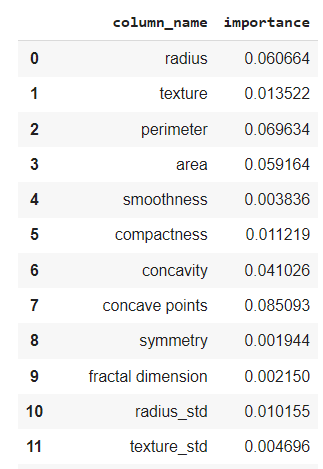

,column_name,importance
0,radius,0.060664
1,texture,0.013522
2,perimeter,0.069634
3,area,0.059164
4,smoothness,0.003836
5,compactness,0.011219
6,concavity,0.041026
7,concave points,0.085093
8,symmetry,0.001944
9,fractal dimension,0.002150


### Part 4 

It seems really difficult to find better values for the RandomForestClassifier. So let's try something else, to improve the results.  
In the previous steps, we used a 'hard' voting classifier.  
We wonder if we can get any better results if we use a 'soft' voting classifier.  
Remember the remark at the bottom of page 194 in the book.

log_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52  
rnd_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52  
svm_clf accuracy_score = 0.9788732394366197  TN = 87   FP = 0   FN = 3   TP = 52   
vot_clf accuracy_score = 0.971830985915493  TN = 86   FP = 1   FN = 3   TP = 52  

log_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52
rnd_clf accuracy_score = 0.9647887323943662  TN = 85   FP = 2   FN = 3   TP = 52
svm_clf accuracy_score = 0.9788732394366197  TN = 87   FP = 0   FN = 3   TP = 52
vot_clf accuracy_score = 0.971830985915493  TN = 86   FP = 1   FN = 3   TP = 52


### Part 5 

The number of FP and FN doesn't seem to change.  
What are those records that are predicted in the wrong way?
1.   Try to get the following overview
2.   Make sure you understand the probabilities of the voting classifier
3.   Which of the records is predicted correct thanks to the voting classifier?
4.   Will it be easy to solve the other incorrectly predicted records?

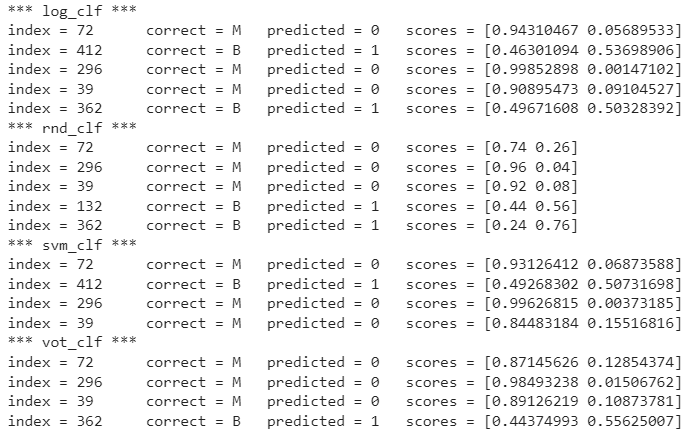

*** log_clf ***
index = 72	correct = M   predicted = 0   scores = [0.94310467 0.05689533]
index = 412	correct = B   predicted = 1   scores = [0.46301094 0.53698906]
index = 296	correct = M   predicted = 0   scores = [0.99852898 0.00147102]
index = 39	correct = M   predicted = 0   scores = [0.90895473 0.09104527]
index = 362	correct = B   predicted = 1   scores = [0.49671608 0.50328392]
*** rnd_clf ***
index = 72	correct = M   predicted = 0   scores = [0.74 0.26]
index = 296	correct = M   predicted = 0   scores = [0.96 0.04]
index = 39	correct = M   predicted = 0   scores = [0.92 0.08]
index = 132	correct = B   predicted = 1   scores = [0.44 0.56]
index = 362	correct = B   predicted = 1   scores = [0.24 0.76]
*** svm_clf ***
index = 72	correct = M   predicted = 0   scores = [0.93126412 0.06873588]
index = 412	correct = B   predicted = 1   scores = [0.49268302 0.50731698]
index = 296	correct = M   predicted = 0   scores = [0.99626815 0.00373185]
index = 39	correct = M   predicted = 0   s

### Part 6 

Still, we'd like to try to make some improvements.  
First we are going to use bagging to improve the logistic regression classifier.  
Write out the oob_score.  
Is this going to help the voting classifier?  
Change the bagging into pasting. Is this any better?

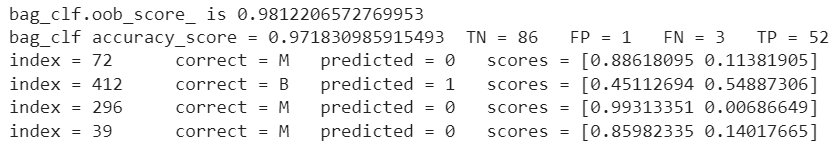



bag_clf.oob_score_ is 0.9859154929577465
bag_clf accuracy_score = 0.971830985915493  TN = 86   FP = 1   FN = 3   TP = 52
index = 72	correct = M   predicted = 0   scores = [0.87988329 0.12011671]
index = 412	correct = B   predicted = 1   scores = [0.45602367 0.54397633]
index = 296	correct = M   predicted = 0   scores = [0.99463228 0.00536772]
index = 39	correct = M   predicted = 0   scores = [0.86902011 0.13097989]


### Part 7 

We are a bit disappointed in the RandomForestClassifier (remember how much better RandomForestClassifier did than SGDClassifier on Heart disease).

So we are going to try ExtraTreesClassifier, AdaBoostClassifier and GradientBoostingClassifier to see if we perhaps can get some better results. Do this the same way as you did in Part 1.

ext_clf accuracy_score = 0.9647887323943662  TN = 86   FP = 1   FN = 4   TP = 51  
ada_clf accuracy_score = 0.9647887323943662  TN = 87   FP = 0   FN = 5   TP = 50  
gbc_clf accuracy_score = 0.9507042253521126  TN = 85   FP = 2   FN = 5   TP = 50  

ext_clf accuracy_score = 0.9647887323943662  TN = 86   FP = 1   FN = 4   TP = 51
ada_clf accuracy_score = 0.9647887323943662  TN = 87   FP = 0   FN = 5   TP = 50
gbc_clf accuracy_score = 0.9507042253521126  TN = 85   FP = 2   FN = 5   TP = 50
